In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/Titanic.csv


In [21]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/titanic/Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Значение колонок**

PassengerId - уникальный идентификатор пассажира

Survived - факт выживания (0 - не выжил, 1 - выжил) пассажира

Pclass - класс билета (1 - высший, 2 - средний, 3 - низший)

Name - полное имя пассажира

Sex - пол пассажира

Age - возраст пассажира

SibSp - количество братьев/сестер или супругов пассажира на борту

Parch - количество детей/родителей пассажира на борту

Ticket - билет пассажира

Fare - стоимость билета

Cabin - номер каюты

Embarked - порт посадки (C = Шербург, Q = Куинстаун, S = Саутгемптон)


# Task 1.EDA и ресерч-анализ


In [22]:
#проверим пропуски 
print(df.isnull().sum())
#типы данных
print("\nDATA Type")
print(df.dtypes)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

DATA Type
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


# Работа с пропусками

In [23]:
#заполним пропуски средним значением
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)
#никак не определить номер кабины, остануться неизвестными, тип object позволяет
df['Cabin'] = df['Cabin'].fillna('Unknown')
#слишком мало, чтобы повлиять на статистику, просто удалим
df = df.dropna(subset=['Embarked'])
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


# Теория: соотношение умер/выжил ухудшается с увеличением возраста
(чем младше - тем больше выжило)

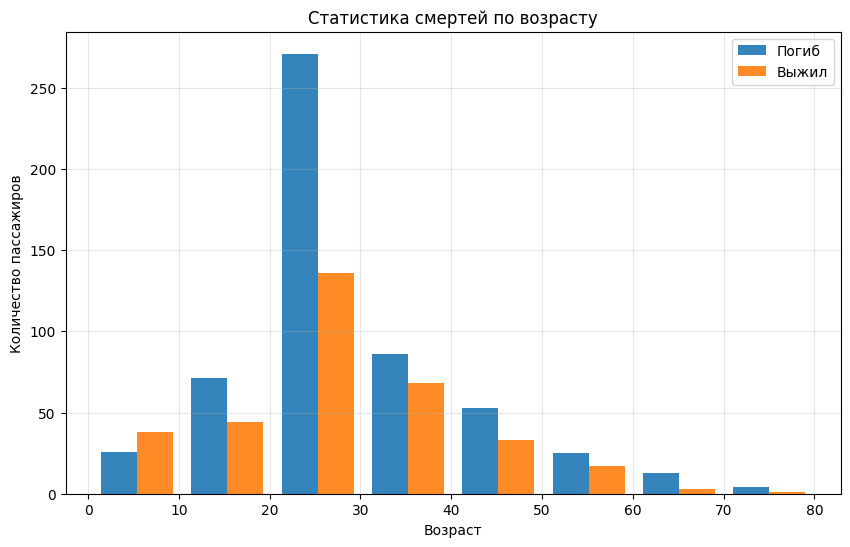

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist([df[df['Survived'] == 0]['Age'].dropna(),
          df[df['Survived'] == 1]['Age'].dropna()],
         bins=8, alpha=0.9, label=['Погиб', 'Выжил'])
plt.title('Статистика смертей по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

теория подтвердилась, в процентном соотношении, чем моложе был пассажир, тем больше шансов выжить, однако стоит учитывать погрешность в возрасте 20-30 лет, так как я заполнил все пустые ячейки средним возрастом 


# Теория: пассажиров с высшим классом билета среди выживших больше


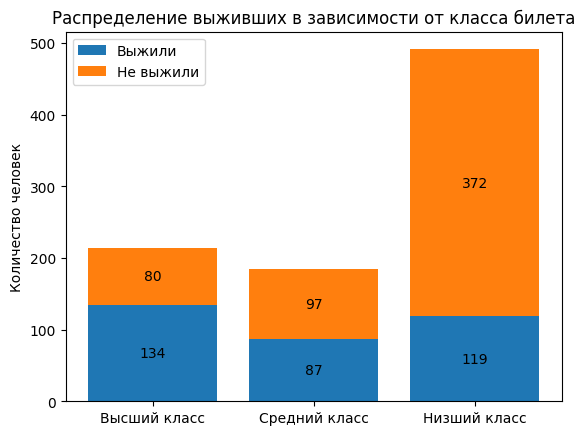

In [25]:
class1_total = len(df.loc[df['Pclass'] == 1])
class2_total = len(df.loc[df['Pclass'] == 2])
class3_total = len(df.loc[df['Pclass'] == 3])

class1_survived = len(df.loc[(df['Survived'] == 1) & (df['Pclass'] == 1)])
class2_survived = len(df.loc[(df['Survived'] == 1) & (df['Pclass'] == 2)])
class3_survived = len(df.loc[(df['Survived'] == 1) & (df['Pclass'] == 3)])

survivors_counts = {
    'Выжили': [class1_survived, class2_survived, class3_survived],
    'Не выжили': [class1_total-class1_survived, class2_total-class2_survived, class3_total-class3_survived]
}

fig, ax = plt.subplots()
bottom = np.zeros(3)

for name, value in survivors_counts.items():
    column = ax.bar(['Высший класс', 'Средний класс', 'Низший класс'], value, label=name, bottom=bottom)
    bottom += value
    ax.bar_label(column, label_type='center')

ax.set_title('Распределение выживших в зависимости от класса билета')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

теория подтвердилась, чем выше класс билета, тем больше шансов выжить

# Теория: у женщин больше шансов выжить, чем у мужчины

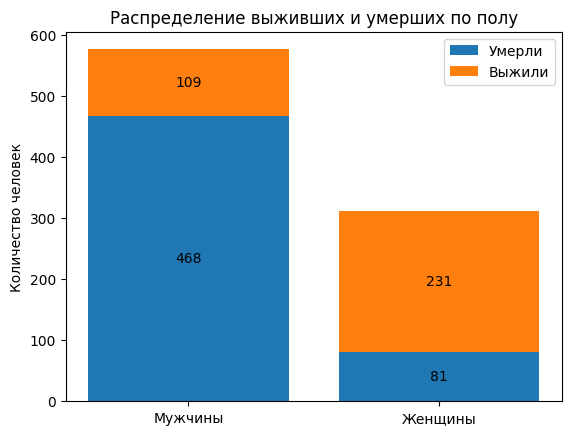

In [26]:
male_deaths = len(df.loc[(df['Sex'] == 'male') & (df['Survived'] == 0)])
male_survivors = len(df.loc[(df['Sex'] == 'male') & (df['Survived'] == 1)])
female_deaths = len(df.loc[(df['Sex'] == 'female') & (df['Survived'] == 0)])
female_survivors = len(df.loc[(df['Sex'] == 'female') & (df['Survived'] == 1)])

import matplotlib.pyplot as plt

survivors_counts = {
    'Умерли': [male_deaths, female_deaths],
    'Выжили': [male_survivors, female_survivors]
}

fig, ax = plt.subplots()
bottom = np.zeros(2)

for name, value in survivors_counts.items():
    column = ax.bar(['Мужчины', 'Женщины'], value, label=name, bottom=bottom)
    bottom += value
    ax.bar_label(column, label_type='center')

ax.set_title('Распределение выживших и умерших по полу')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

теория подтвердилась,у женщин было больше шансов выжить

# График корреляций

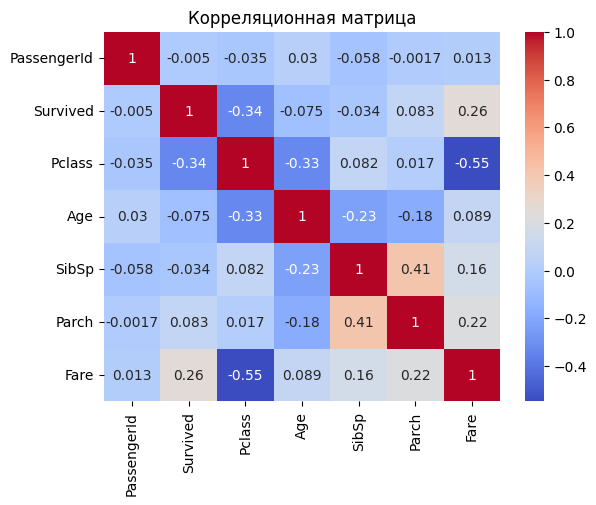

In [27]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True,cmap='coolwarm' )
plt.title('Корреляционная матрица')
plt.show()

# Векторизация

In [28]:
# Выбираем нечисловые признаки
non_numeric_feature = df.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder
for feature in non_numeric_feature:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,522,7.2500,146,2
1,2,1,1,190,0,38.000000,1,0,595,71.2833,80,0
2,3,1,3,353,0,26.000000,0,0,668,7.9250,146,2
3,4,1,1,272,0,35.000000,1,0,48,53.1000,54,2
4,5,0,3,15,1,35.000000,0,0,471,8.0500,146,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,547,1,27.000000,0,0,100,13.0000,146,2
887,888,1,1,303,0,19.000000,0,0,14,30.0000,29,2
888,889,0,3,412,0,29.699118,1,2,674,23.4500,146,2
889,890,1,1,81,1,26.000000,0,0,8,30.0000,59,0


# Логистическая регрессия

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Подготовка данных
X = df.drop(columns=['Survived'])
Y = df['Survived']

# Разделение на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Логистическая регрессия
model = LogisticRegression(max_iter=1500)

# Метрики
metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'f1': f1_score,
    'neg_mean_absolute_error': mean_absolute_error,
    'neg_mean_squared_error': mean_squared_error, 
    'neg_log_loss': log_loss
}

# Кроссвалидация
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}
for metric_name, metric in metrics.items():
    scores = cross_val_score(model, X, Y, cv=kf, scoring=metric_name)
    results[metric_name] = scores
    print(f"{metric_name}: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")
    


accuracy: 0.7997 (+/- 0.0256)
precision: 0.7510 (+/- 0.0652)
recall: 0.7132 (+/- 0.0493)
f1: 0.7301 (+/- 0.0456)
neg_mean_absolute_error: -0.2003 (+/- 0.0256)
neg_mean_squared_error: -0.2003 (+/- 0.0256)
neg_log_loss: -0.4515 (+/- 0.0244)


Модель показывает хорошие результаты по всем метрикам. 
Точность и полнота находятся на высоком уровне, что свидетельствует о хорошей производительности модели. 
Средняя абсолютная ошибка и среднеквадратичная ошибка также находятся на приемлемом уровне, логарифмическая ошибка - отличная.

# Дерево решений

accuracy: 0.7514 (+/- 0.0418)
precision: 0.6591 (+/- 0.0395)
recall: 0.7078 (+/- 0.0479)
f1: 0.6903 (+/- 0.0366)
neg_mean_absolute_error: -0.2441 (+/- 0.0311)
neg_mean_squared_error: -0.2486 (+/- 0.0284)
neg_log_loss: -9.0016 (+/- 1.7635)


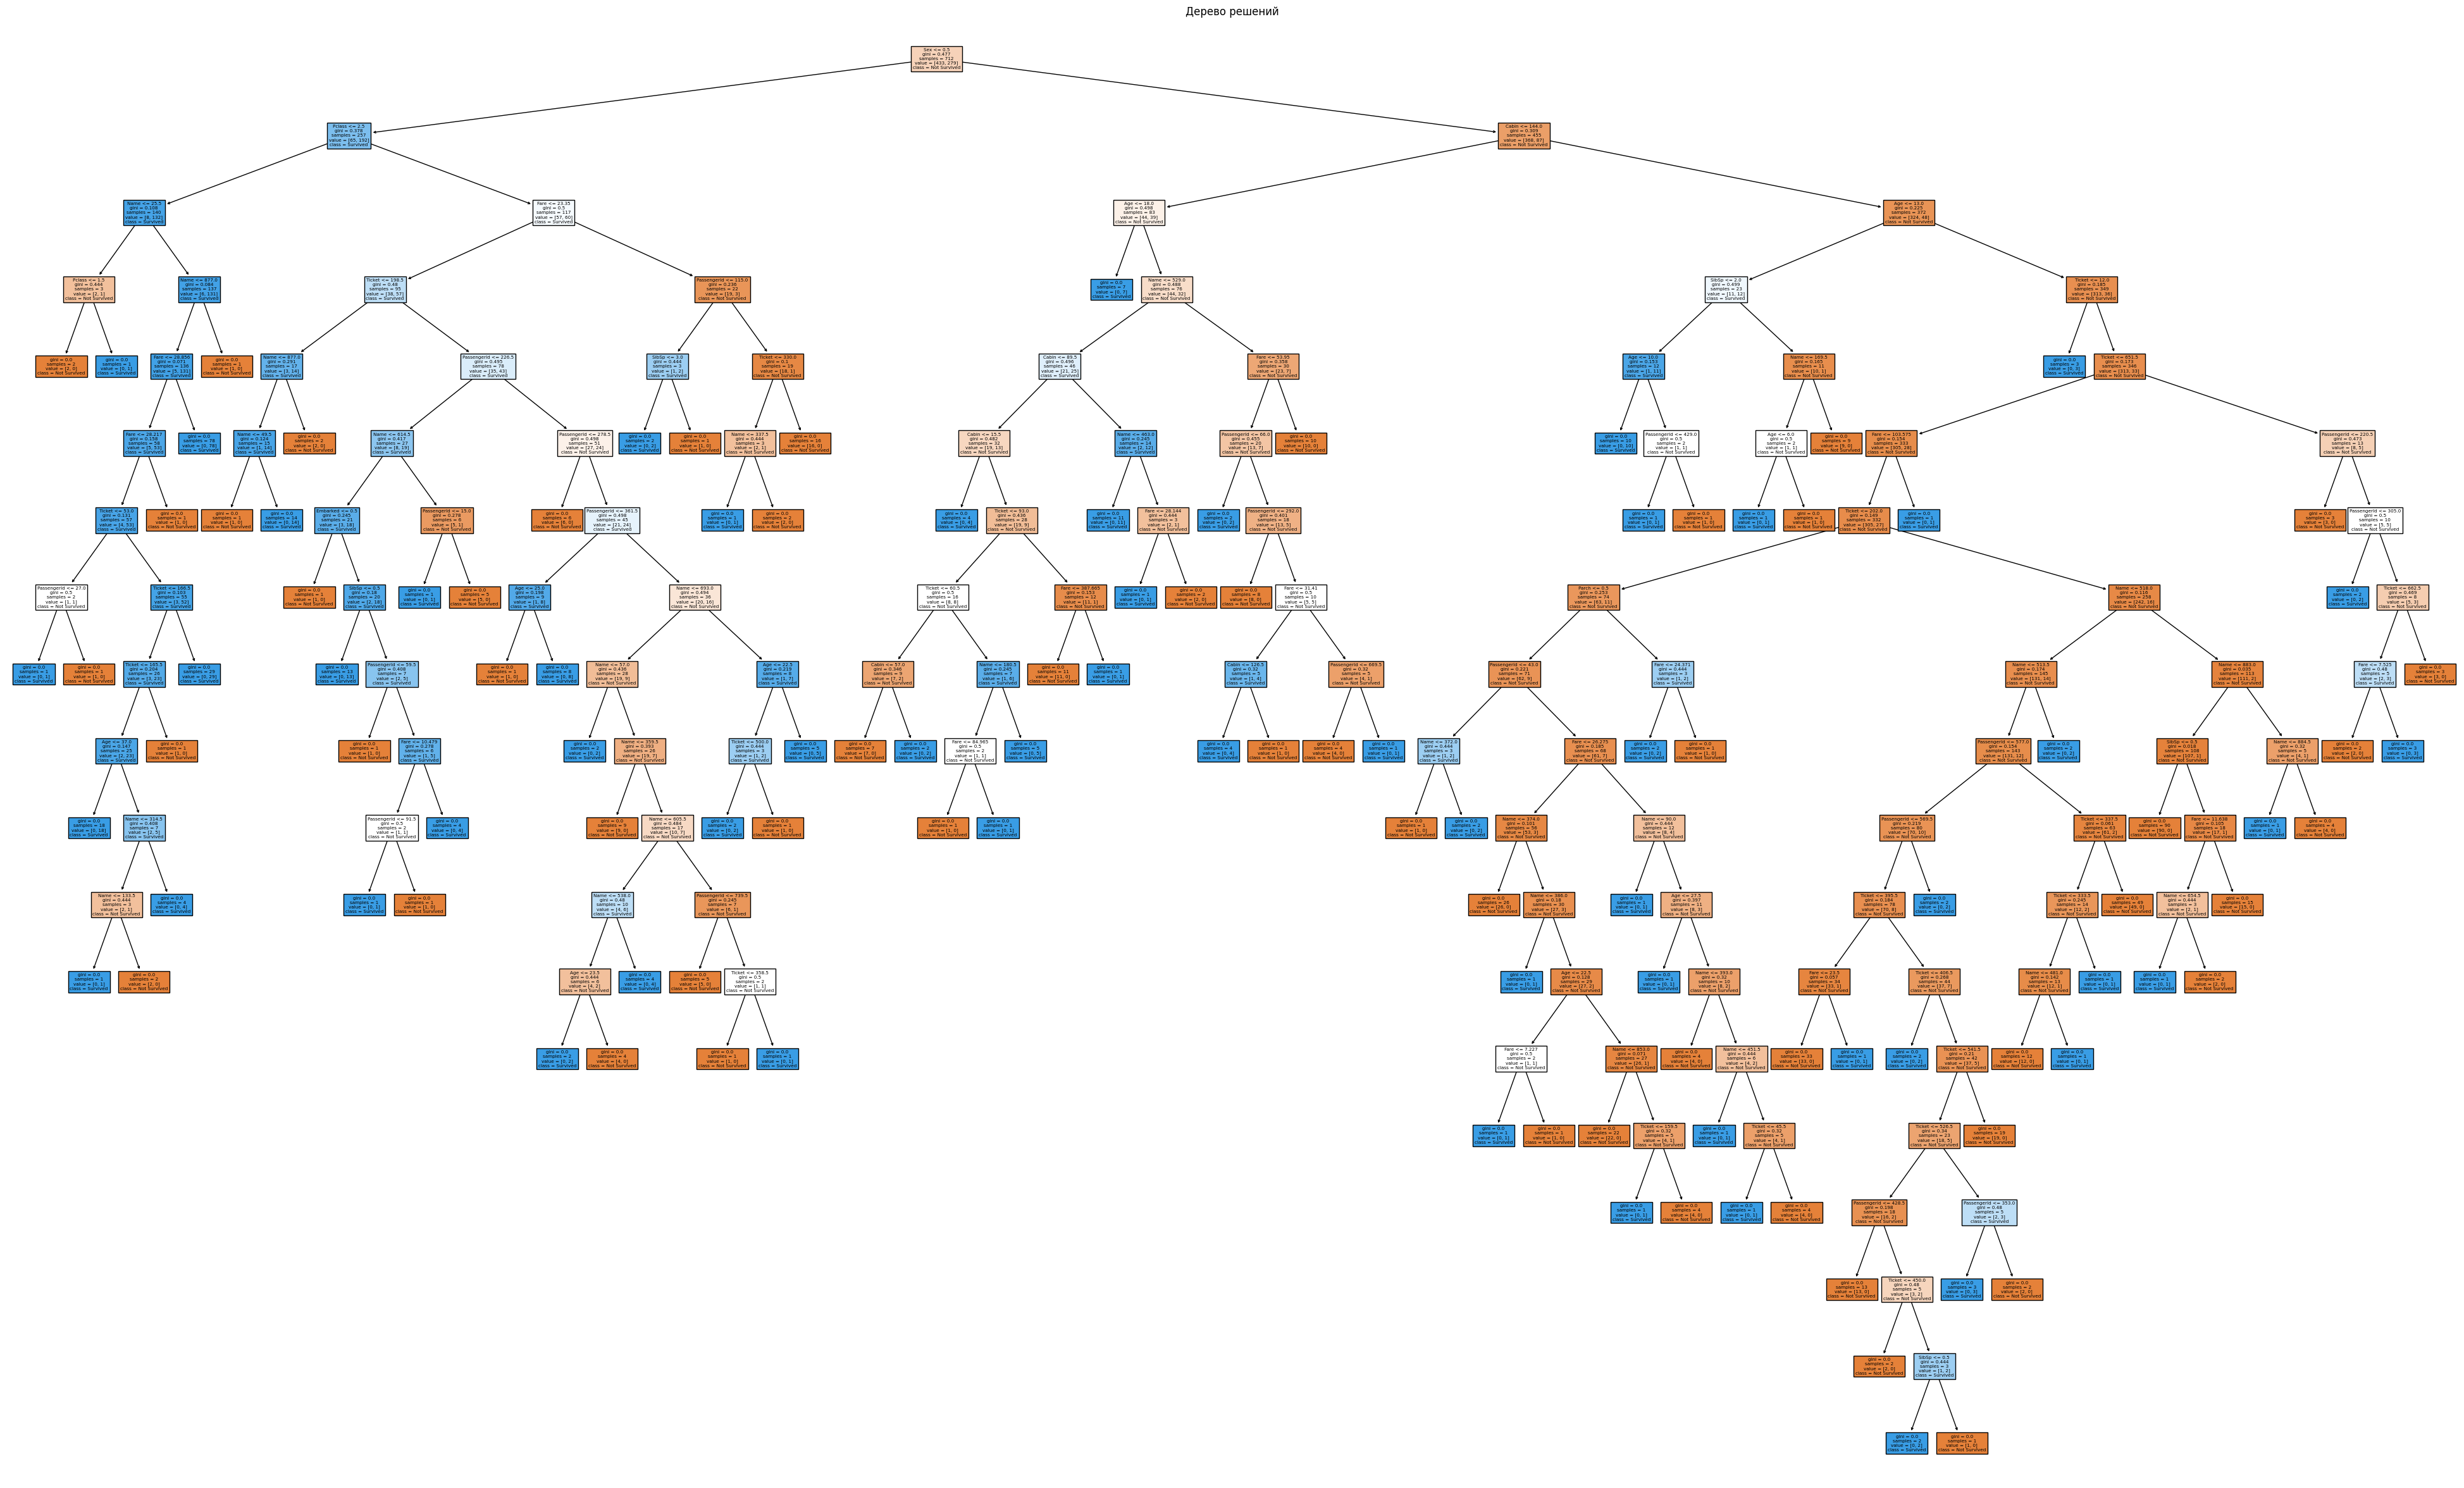

In [70]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier()

# Кроссвалидация
results = {}
for metric_name, metric in metrics.items():
    scores = cross_val_score(model, X, Y, cv=kf, scoring=metric_name)
    results[metric_name] = scores
    print(f"{metric_name}: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")


# Дерево решений
model.fit(X_train, Y_train) 

plt.figure(figsize=(50, 30))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title('Дерево решений')
plt.show()

Модель дерева решений показывает удовлетворительные результаты по точности и полноте, но имеет низкую уверенность в предсказаниях, что видно по высочайшей логарифмической ошибке

accuracy: 0.8245 (+/- 0.0187)
precision: 0.7927 (+/- 0.0314)
recall: 0.7350 (+/- 0.0106)
f1: 0.7624 (+/- 0.0169)
neg_mean_absolute_error: -0.1755 (+/- 0.0187)
neg_mean_squared_error: -0.1755 (+/- 0.0187)
neg_log_loss: -0.5462 (+/- 0.1074)


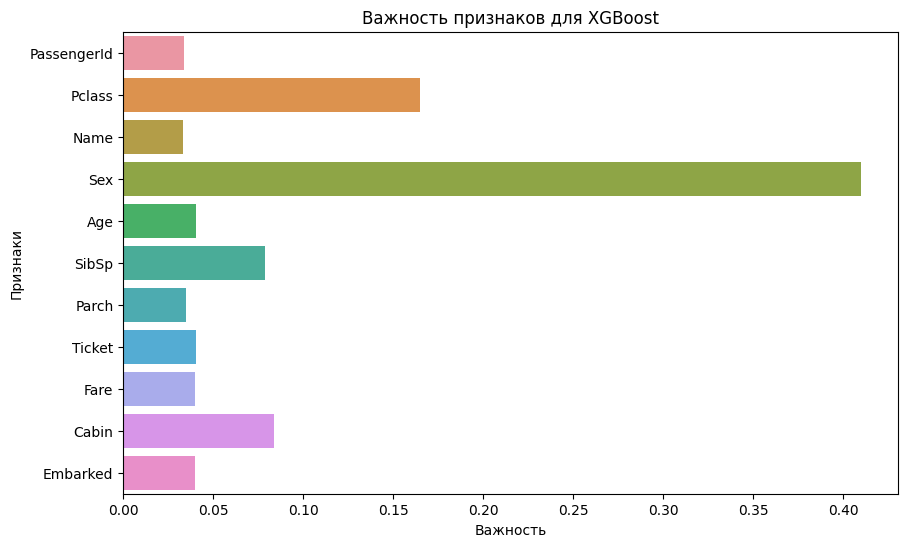

In [53]:
from xgboost import XGBClassifier

model = XGBClassifier()

results = {}
for metric_name, metric in metrics.items():
    scores = cross_val_score(model, X, Y, cv=kf, scoring=metric_name)
    results[metric_name] = scores
    print(f"{metric_name}: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")

model.fit(X_train, Y_train)

# Важность признаков
importances = model.feature_importances_
feature_names = X.columns

# График важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Важность признаков для XGBoost')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.show()

наивысшая точность, но и высокая уверенность ошибки(log_loss)

# Нейронная сеть

In [66]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(150,), max_iter=2000)

# Кроссвалидация
results = {}
for metric_name, metric in metrics.items():
    scores = cross_val_score(model, X, Y, cv=kf, scoring=metric_name)
    results[metric_name] = scores
    print(f"{metric_name}: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")

accuracy: 0.6547 (+/- 0.0751)
precision: 0.6318 (+/- 0.0995)
recall: 0.4093 (+/- 0.1766)
f1: 0.5628 (+/- 0.0483)
neg_mean_absolute_error: -0.2993 (+/- 0.0519)
neg_mean_squared_error: -0.3082 (+/- 0.0424)
neg_log_loss: -0.7713 (+/- 0.0607)


показывает низкую точность и полноту, что указывает на проблемы с обобщением данных. Логарифмическая ошибка также высокая, что свидетельствует о низкой уверенности модели в предсказаниях

# Выбор лучшей модели

In [64]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(150,), max_iter=1500)
}


best_model = None
best_score = -np.inf

for model_name, model in models.items():
    scores = cross_val_score(model, X, Y, cv=kf, scoring='accuracy')
    mean_score = np.mean(scores)
    
    if mean_score > best_score:
        best_score = mean_score
        best_model = model
    
    print(f"{model_name}: {mean_score:.4f}")

print(f"\nЛучшая модель: {best_model.__class__.__name__}")
print(f"Лучшая точность: {best_score:.4f}")

Logistic Regression: 0.7997
Decision Tree: 0.7638
XGBoost: 0.8245
Neural Network: 0.7098

Лучшая модель: XGBClassifier
Лучшая точность: 0.8245
